In [17]:
#import jax 
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import random

(100, 2)


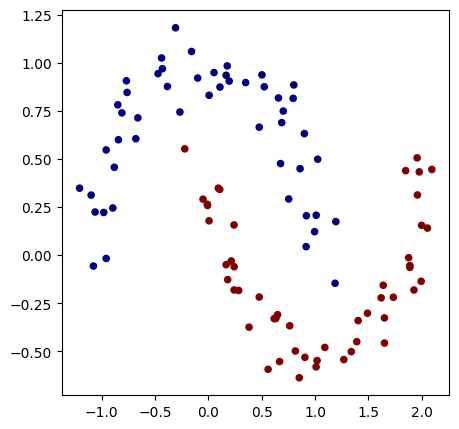

In [27]:
#generate test data
import matplotlib as plt
from sklearn.datasets import make_moons, make_blobs
X, Y = make_moons(n_samples=100, noise=0.1)
Y = Y*2 - 1 
print(jnp.shape(X))

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=Y, s=20, cmap='jet')
#convert data to jax.numpy arrays
X = jnp.array(X)
Y = jnp.array(Y)



In [19]:
key = random.PRNGKey(0)
weightKey, biasKey = random.split(key)

In [20]:
#initialize dimensions
inputSize = 2
neuronsPerLayer = 16
outputSize = 1

layerOneShape = (neuronsPerLayer, inputSize)
layerTwoShape = (outputSize, neuronsPerLayer)

#Scale to accelerate learning
scale = 1e-1

#initialize initial random values for weights and biases 
weightOne = scale * random.normal(weightKey, layerOneShape)
biasOne = scale * random.normal(biasKey, (neuronsPerLayer,))

weightTwo = scale * random.normal(weightKey, layerTwoShape)
biasTwo = scale * random.normal(biasKey, (outputSize,))

In [21]:
#insert parameters into dictionary to keep track of them as they get updated
params = {
    'weightOne': weightOne,
    'biasOne': biasOne,
    'weightTwo': weightTwo,
    'biasTwo': biasTwo,
}

#create basic relu to use as activation function
def relu(x):
  return jnp.maximum(0, x)

In [22]:
#function to run model, forward pass
def predict(params, input):
  weightOne = params['weightOne']
  biasOne = params['biasOne']
  weightTwo = params['weightTwo']
  biasTwo = params['biasTwo']

  z1 = jnp.dot(weightOne, input) + biasOne
  a1 = relu(z1)
  z2 = jnp.dot(weightTwo, a1) + biasTwo
  return z2

#Mean Square Error as simple loss function
def loss(params, input, target):
  prediction = predict(params, input)
  return jnp.mean((prediction - target) ** 2)



#set step size to 0.01 to accelerate learning
step_size = 0.01


#define update function to update gradients
def update(params, input, target):
  #take gradient of loss function with respect to params dictionary 
  grad_fn = grad(loss)
  gradients = grad_fn(params, input, target)

  dweightOne = gradients['weightOne']
  dbiasOne = gradients['biasOne']
  dweightTwo = gradients['weightTwo']
  dbiasTwo = gradients['biasTwo']

  #return updated parameters
  new_params = {}
  new_params['weightOne'] = params['weightOne'] - step_size * dweightOne
  new_params['biasOne'] = params['biasOne'] - step_size * dbiasOne
  new_params['weightTwo'] = params['weightTwo'] - step_size * dweightTwo
  new_params['biasTwo'] = params['biasTwo'] - step_size * dbiasTwo

  return new_params




Epoch #0, loss = 0.9050161242485046
Epoch #10, loss = 0.30154892802238464
Epoch #20, loss = 0.28597182035446167
Epoch #30, loss = 0.2586159110069275
Epoch #40, loss = 0.21496383845806122
Epoch #50, loss = 0.16150258481502533
Epoch #60, loss = 0.10288254916667938
Epoch #70, loss = 0.08179374039173126
Epoch #80, loss = 0.0726473405957222
Epoch #90, loss = 0.06761444360017776
Epoch #100, loss = 0.06465234607458115
Epoch #110, loss = 0.061938632279634476
Epoch #120, loss = 0.05829617381095886
Epoch #130, loss = 0.05402439087629318
Epoch #140, loss = 0.050361014902591705


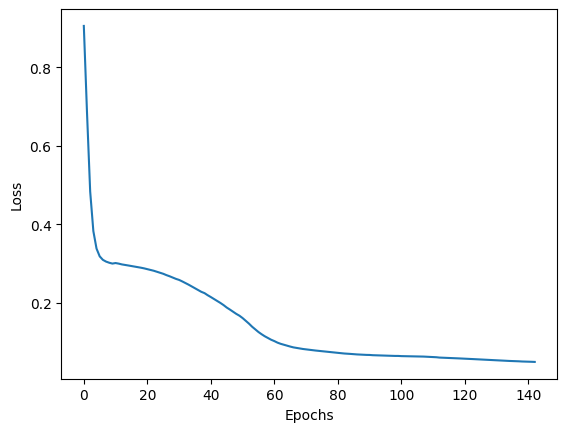

In [23]:
#train model for 500 epochs or until loss is below 0.05
losses = []
for epoch in range(500):
  avg_loss = 0
  for x, y in zip(X, Y):
    #update 
    params = update(params, x, y)
    avg_loss += loss(params, x, y)

  avg_loss = avg_loss / 100
  losses.append(avg_loss)
  if epoch % 10 == 0:
    print(f"Epoch #{epoch}, loss = {avg_loss}")
  if avg_loss < 0.05:
    break


#plot loss correction
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [33]:
results = []
for x in X:
  result = predict(params, x)
  #print(x,result, float(result) > 0.5)
  if float(result) > 0.5:
    results.append(1)
  else:
    results.append(-1)

wrongCount = 0
#Count how many wrong predictions
for i in range(len(Y)):
  if results[i] != Y[i]:
    wrongCount += 1




print("First ten of results compared to actual result.\nNote: Results rounded to closer of -1 or 1.")
print(results[:10])
print(Y[:10])

print('Overall Accuracy: ', 1 - wrongCount/len(Y))

First ten of results compared to actual result.
Note: Results rounded to closer of -1 or 1.
[1, -1, 1, -1, 1, 1, 1, -1, 1, -1]
[ 1 -1  1 -1  1  1  1 -1  1 -1]
Overall Accuracy:  0.99
